# Tutorial: AR1 and Discretization

## Computational Economics  (ECO309)

---

In [21]:
using Plots


### Simulating an AR1

Choose a 2x2 matrix $P$ (with spectral radius <1) and a 2x2 matrix Q.

Consider the VAR1 process $x_t = P x_{t-1} + Q \epsilon_t$ where $\epsilon_t= (\eta_{1,t}, \eta_{2,t})$ with $\eta_1\sim\mathcal{N}(0,1)$ and $\eta_1\sim\mathcal{N}(0,1)$

In [2]:
P = [ 0.4 0.1 ; 0.2 0.9 ]
P

2×2 Matrix{Float64}:
 0.4  0.1
 0.2  0.9

In [4]:
using LinearAlgebra

In [5]:
eigvals(P)

2-element Vector{Float64}:
 0.36277186767309855
 0.9372281323269015

In [6]:
Q = [0.1 0 ; 0 0.1]

2×2 Matrix{Float64}:
 0.1  0.0
 0.0  0.1

__Compute impulse response functions.__

In [11]:
T = 100

100

In [14]:
ϵ_1  = [1.0, 0]
ϵ_2  = [0, 1]

2-element Vector{Int64}:
 0
 1

In [22]:
irf_1 = [P^t * ϵ_1 for t=1:T] ;
irf_2 = [P^t * ϵ_2 for t=1:T] ;

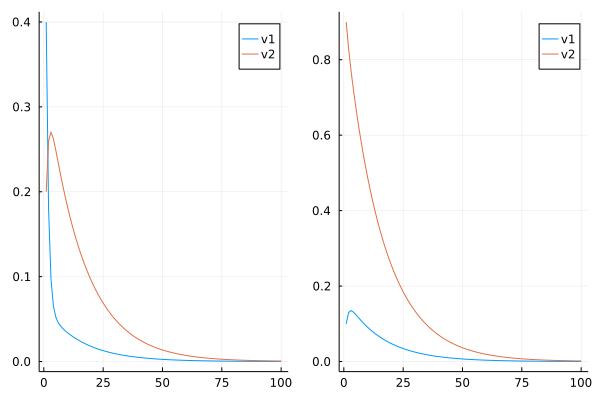

In [26]:
pl1 = plot( [e[1] for e in irf_1 ], label="v1")
plot!(pl1, [e[2] for e in irf_1 ], label="v2")
pl2 = plot( [e[1] for e in irf_2 ], label="v1")
plot!(pl2, [e[2] for e in irf_2 ], label="v2")
plot(pl1, pl2)

__Simulate the process for $T$ periods.__

In [34]:
function simulate(P, Q, T; s0=zeros(size(P,1)))
    sim = [s0]
    for t=1:T
        η1 = randn()
        η2 = randn()
        ϵ = [η1, η2]
        s1 = P*s0 + Q*ϵ
        push!(sim, s1)
        s0 = s1
    end
    return sim
end

simulate (generic function with 1 method)

In [35]:
sim = simulate(P, Q, 100);

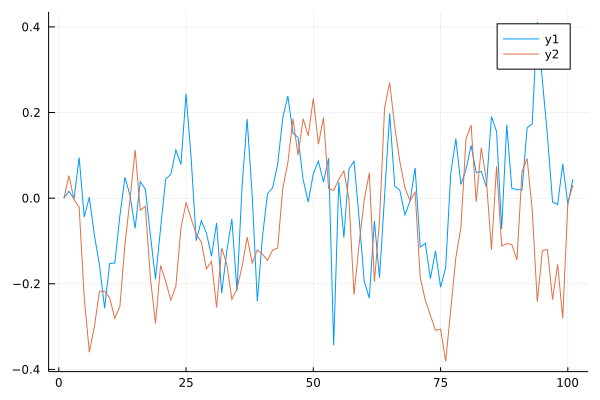

In [36]:
pl1 = plot([e[1] for e in sim])
plot!(pl1, [e[2] for e in sim])

In [38]:
sim = simulate(P, Q, 100; s0 = [1.0,0]);

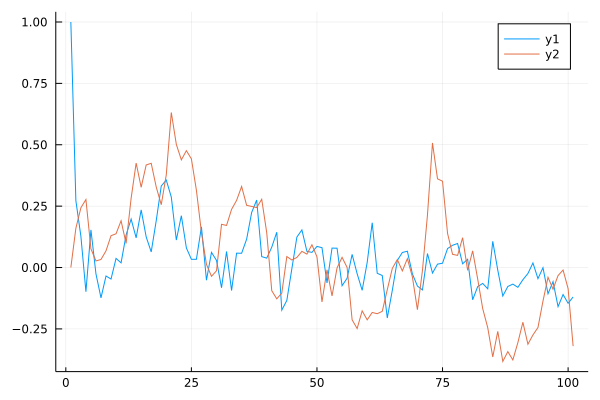

In [39]:
pl1 = plot([e[1] for e in sim])
plot!(pl1, [e[2] for e in sim])

__Simulate the process $N=1000$ times for $T=1000$ periods. How would you store the results?__

In [41]:
sims = [simulate(P, Q, 100; s0 = [1.0,0]) for n=1:1000];

In [44]:
pl = plot([e[1] for e in sim])
for sim in sims
    plot!(pl, [e[1] for e in sim], alpha=0.1, color="red")
end
pl

__Make density plots to illustrate the ergodic property of the process__

__Compute the asymptotic variance of the process. Compare with the theoretical one.__

---

### Pricing a stream of dividends.

Let us define

$$d_n = \rho_d d_{n-1} + \epsilon_{d,n}$$
$$x_n = \rho_x x_{n-1} + \epsilon_{x,n}$$

$$\beta_n = \beta^n \exp(x_n)$$

where $0<\beta<1$.




Define the price of the stream of dividend $$p(d, x) = \mathbb{E}_0 \sum_{t\geq 0} \beta_t d_t$$

where $d_0 = d$, $x_0=x$.


We want to compute $p(0,0)$.

__Use a Monte-Carlo approach to approximate $p(0,0)$__

__Write down the recursive equation satisfied by $p()$.__

__Discretize $d_n$ and $x_n$ as 3-states Markov Chains__

__Approximate $p(s,x)$ using the Markov Chain discretization.__